# Análisis Exploratorio de Datos (EDA)
---

### Contenido:
1. Objetivos 
2. Análsis de Datos de Internet Fijo

    2.1 Estadística descriptiva
    
    2.2 Visualización de datos
    
    2.3 Conclusiones
3. Análisis de Datos de Internet Móvil

    3.1 Estadística descriptiva
    
    3.2 Visualiación de datos
    
    3.3 Conclusiones
4. Análisis de Datos de Reclamos 

    
    4.1 Estadística descriptiva
    
    4.2 Visualiación de datos
    
    4.3 Conclusiones

---

### 1. Objetivos
1.1 Análizar visualmente el comportamiento y tendencia de las variables

1.2 Determinar las variables reelevantes que puedan resultar en un caso de estudio


In [25]:
# Importamos las librerías a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ______________________________________________________________________________________

### 2. Análisis de Datos de Internet Fijo

### 2.1 Estadística descriptiva

In [28]:
internet_fijo = pd.read_csv('Data_set/Data_internet_fijo/Data_clean/inter_nac_fijo_clean.csv')

In [29]:
# Medidas de Tendencia central de variables numéricas
internet_fijo.describe(include=[np.number])

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,35.000000,35.000000,35.000000,35.000000
mean,2017.885714,2.457143,60.275429,18.606286
std,2.564135,1.120474,8.148909,2.662968
min,2014.000000,1.000000,49.550000,15.050000
25%,2016.000000,1.500000,52.985000,16.245000
50%,2018.000000,2.000000,59.160000,18.240000
75%,2020.000000,3.000000,66.050000,20.475000
max,2022.000000,4.000000,76.640000,23.950000


_- En promedio hay un acceso de internet de 60 accesos durante los años 2014 al 2022_

_- En promedio de cada 100 habitantes solo tienen acceso a internet 18 personas durante los años 2014 al 2022_

Ingresos anuales por el servicio de internet fijo

In [32]:
ingresos = pd.read_csv('Data_set/Data_internet_fijo/Data_clean/13_Internet_Ingresos.csv')

In [33]:
# Medidas de Tendencia central de variables numéricas
ingresos.describe(include=[np.number])

,Anio,Trimestre,Ingresos (miles de pesos)
count,35.000000,35.000000,3.500000e+01
mean,2017.885714,2.457143,2.058845e+07
std,2.564135,1.120474,1.774214e+07
min,2014.000000,1.000000,2.984054e+06
25%,2016.000000,1.500000,6.235543e+06
50%,2018.000000,2.000000,1.431947e+07
75%,2020.000000,3.000000,3.204996e+07
max,2022.000000,4.000000,6.705593e+07


_- En promedio hay 20 588 450 000 pesos entre los años 2014 y 2022_

Alcance del servicio de Internet fijo en relación con el número total de hogares en Argentina

In [21]:
internet_fijo.head(3) # Miramos las primeras 3 líneas

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,3,76.64,23.95,Jul-Sept 2022
1,2022,2,75.97,23.72,Abr-Jun 2022
2,2022,1,73.88,23.05,Ene-Mar 2022


In [38]:
# Convertimos las variables 'Año', 'Trimestre' y 'Periodo' a Category
internet_fijo['Año'] = internet_fijo['Año'].astype('category')
internet_fijo['Trimestre'] = internet_fijo['Trimestre'].astype('category')
internet_fijo['Periodo'] = internet_fijo['Periodo'].astype('category')

In [42]:
# Convertimos las variables 'Año', 'Trimestre' y 'Periodo' a Category
internet_fijo['Año'] = ingresos['Anio'].astype('category')
internet_fijo['Trimestre'] = ingresos['Trimestre'].astype('category')
internet_fijo['Periodo'] = ingresos['Periodo'].astype('category')

### 2.2 Visualización de datos

Crecimiento en porcentaje de los ingresos

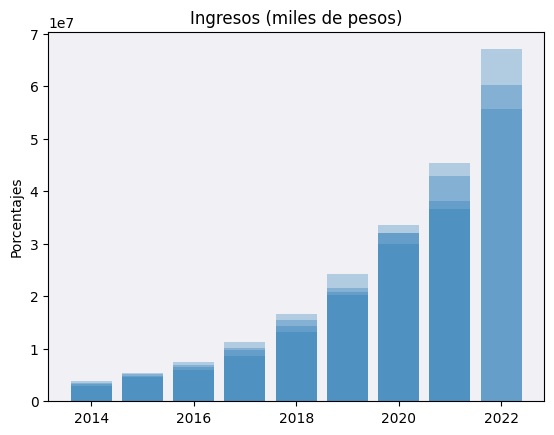

In [44]:
plt.rcParams['axes.facecolor'] = '#F1F0F5'
plt.bar(ingresos['Anio'],ingresos['Ingresos (miles de pesos)'], alpha=0.3)
plt.ylabel('Porcentajes')
plt.title('Ingresos (miles de pesos)')
plt.show()

_- La tendencia del incremento de ingresos anuales son de tipo exponencial_

Porcentaje incremento anual por cada 100 habitantes

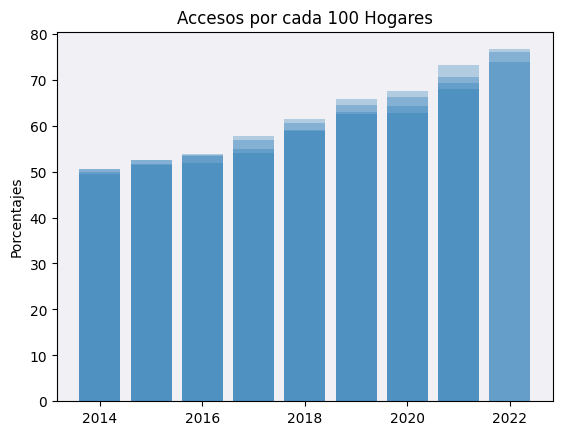

In [12]:
plt.rcParams['axes.facecolor'] = '#F1F0F5'
plt.bar(internet_fijo['Año'],internet_fijo['Accesos por cada 100 hogares'], alpha=0.3)
plt.ylabel('Porcentajes')
plt.title('Accesos por cada 100 Hogares')
plt.show()

In [14]:
# Cáculo del incremento en porcentaje por semestre
internet_fijo = internet_fijo.sort_values(by='Año')
internet_fijo['Crecimiento (%)'] = internet_fijo['Accesos por cada 100 hogares'].pct_change() * 100
print(internet_fijo[['Año', 'Accesos por cada 100 hogares', 'Crecimiento (%)']])


     Año  Accesos por cada 100 hogares  Crecimiento (%)
34  2014                         49.55              NaN
31  2014                         50.50         1.917255
33  2014                         49.86        -1.267327
32  2014                         50.67         1.624549
30  2015                         51.36         1.361753
29  2015                         51.76         0.778816
28  2015                         52.46         1.352396
27  2015                         52.63         0.324056
26  2016                         51.85        -1.482044
24  2016                         53.73         3.625844
23  2016                         53.94         0.390843
25  2016                         53.34        -1.112347
22  2017                         54.16         1.537308
21  2017                         54.90         1.366322
20  2017                         56.90         3.642987
19  2017                         57.78         1.546573
18  2018                         58.82         1

_Hay un incremento sostenido año a año, el crecimiento esa casi lineal, pero tampoco es exponencial_

Se calcula el crecimiento anual

In [17]:
df_grouped = internet_fijo.groupby('Año').agg({'Accesos por cada 100 hogares': 'first'}).pct_change() * 100
df_grouped = df_grouped.round(2)
df_grouped = df_grouped.rename(columns={'Accesos por cada 100 hogares': 'Crecimiento anual %'})
df_grouped

,Crecimiento anual %
Año,
2014,NaN
2015,3.65
2016,0.95
2017,4.46
2018,8.60
2019,6.22
2020,6.13
2021,2.47
2022,8.73


Se calcula el promedio del crecimiento anual

In [15]:
print(df_grouped['Crecimiento anual %'].mean().round(2))

5.37


Se calcula la variabilidad del crecimiento anual

In [18]:
desviacion_estandar = df_grouped['Crecimiento anual %'].std().round(2)
desviacion_estandar

2.79

### 2.3 Conclusiones
- Hay un crecimiento sostenido de tipo lineal en el acceso de internet fijo
- El incremento de ingresos anuales del servicio de internet tienen una tendencia creciente exponencial
- El crecimiento anual es de 5.1 %
- La tendencia indica que para el año 2023 seguirá creciendo en promedio un 6 %
- Variabilidad del crecimiento: La desviación estándar del crecimiento anual de los accesos a Internet en Argentina es de aproximadamente 2.79 %

---
### 3. Análisis de Datos de Internet Móvil


### 3.1 Estadística descriptiva

In [82]:
opera = pd.read_csv('Data_set/Data_internet_movil/Portabilidad.csv')
acces = pd.read_csv('Data_set/Data_internet_movil/telefonia_movil.csv')
ingre = pd.read_csv('Data_set/Data_internet_movil/telefonia_movil_ingresos.csv')

In [91]:
acces.head(3)

,Año,Trimestre,Total de accesos pospago,Total de accesos prepago,Total de accesos operativos,Periodo
0,2013,1,7761349,57147608,64908957,Ene-Mar 2013
1,2013,2,7769110,58004822,65773932,Abr-Jun 2013
2,2013,3,8002183,59048909,67051092,Jul-Sept 2013


In [84]:
# Medidas de Tendencia central de variables numéricas

opera.describe(include=[np.number])

,Año,Mes,Personal,Claro,Nextel,Movistar,Otros
count,128.000000,128.00000,128.000000,128.000000,78.000000,128.000000,8.000000
mean,2017.000000,6.50000,48451.203125,55903.789062,126.512821,50710.351562,62.625000
std,3.099403,3.40449,32813.900654,33630.921754,142.875638,39642.222769,54.706849
min,2012.000000,1.00000,40.000000,72.000000,0.000000,41.000000,9.000000
25%,2014.000000,4.00000,27059.500000,32455.500000,12.250000,12531.250000,26.250000
50%,2017.000000,6.50000,40306.000000,51919.500000,91.500000,43400.500000,45.500000
75%,2020.000000,9.00000,65206.750000,76497.750000,174.250000,85553.000000,76.250000
max,2022.000000,12.00000,179629.000000,132676.000000,676.000000,143327.000000,153.000000


_- El incremento de los usuarios desde el 2012 hasta el 2022 es significativo_

_- Hay datos nulos, aún no se puede generar una deducción más profunda_

In [87]:
acces.describe(include=[np.number])

,Año,Trimestre,Total de accesos pospago,Total de accesos prepago,Total de accesos operativos
count,39.000000,39.000000,3.900000e+01,3.900000e+01,3.900000e+01
mean,2017.384615,2.461538,6.958380e+06,5.329919e+07,6.025759e+07
std,2.852657,1.120295,8.933039e+05,2.531044e+06,3.280048e+06
min,2013.000000,1.000000,5.556299e+06,4.906016e+07,5.461989e+07
25%,2015.000000,1.500000,6.144759e+06,5.183424e+07,5.820528e+07
50%,2017.000000,2.000000,7.108228e+06,5.310204e+07,6.022186e+07
75%,2020.000000,3.000000,7.635581e+06,5.475712e+07,6.217666e+07
max,2022.000000,4.000000,8.674516e+06,5.904891e+07,6.756903e+07


_- La cantidad de accesos anuales en promedio es de 60 257 590_

_- Desde el año 2013 hasta el 2022 se ha duplicado el acceso anual de internet movil_

_- La comparativa de accesos entre internet fijo y movil, podrían ser reveleadores para una caso de estudio_

In [89]:
ingre.describe(include=[np.number])

,Año,Trimestre,Ingresos (miles de $)
count,39.000000,39.000000,3.900000e+01
mean,2017.384615,2.461538,5.310811e+07
std,2.852657,1.120295,4.190357e+07
min,2013.000000,1.000000,1.313524e+07
25%,2015.000000,1.500000,2.089878e+07
50%,2017.000000,2.000000,3.811003e+07
75%,2020.000000,3.000000,7.280805e+07
max,2022.000000,4.000000,1.740578e+08


_- El promedio anual de accesos es de  53 108 110 entre el 2013 y el 2022_

_- El tipo de crecimiento o tendencia podría ser exponencial_

_- En el 2013 hubo 13 135 240, pero en el 2022 hubo 174 057 800, hay un claro crecimiento excesivo_

### 3.2 Visualización de datos

Crecimiento en porcentaje de los ingresos por internet móvil

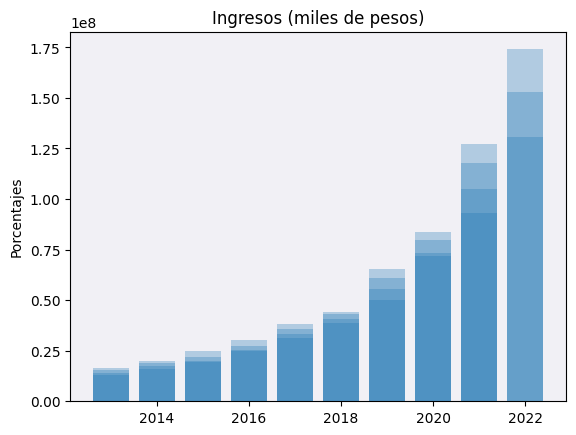

In [90]:
plt.rcParams['axes.facecolor'] = '#F1F0F5'
plt.bar(ingre['Año'],ingre['Ingresos (miles de $)'], alpha=0.3)
plt.ylabel('Porcentajes')
plt.title('Ingresos (miles de pesos)')
plt.show()

_- El crecimiento del accesos del servicio de internet movil, ha tenido un rendimiento mayor al de la telefonía fija_

_- La tendencia es exponencial, pero este crecimiento se soporta de otras variables, como el ingreso familiar percápita, el crecimiento de la economía del pais, entre otras cosas. Se tiene que evaluar más_

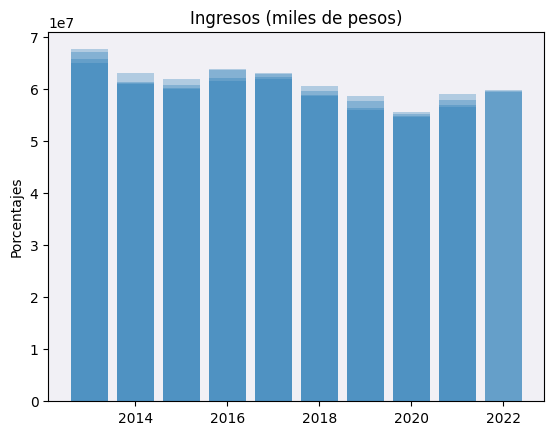

In [92]:
plt.rcParams['axes.facecolor'] = '#F1F0F5'
plt.bar(acces['Año'],acces['Total de accesos operativos'], alpha=0.3)
plt.ylabel('Porcentajes')
plt.title('Total de accesos operativos')
plt.show()

_- El comportamiento del total de accesos de internet móvil es similar al del acceso a internet movil prepago, se debe a que es por la cantidad de usuarios, resulta siginificativamente mayor a los usuariuos que consumen pospago_

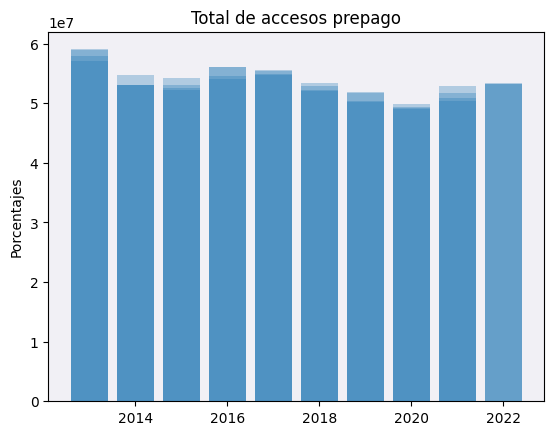

In [93]:
plt.rcParams['axes.facecolor'] = '#F1F0F5'
plt.bar(acces['Año'],acces['Total de accesos prepago'], alpha=0.3)
plt.ylabel('Porcentajes')
plt.title('Total de accesos prepago')
plt.show()

_- El acceso a prepago es más popular que el accesos a internet prepago, su comportamiento es interesante, desde el 2013 esta decreciendo ligeramente, esto podría tener una explicación más clara considerando otras variables_

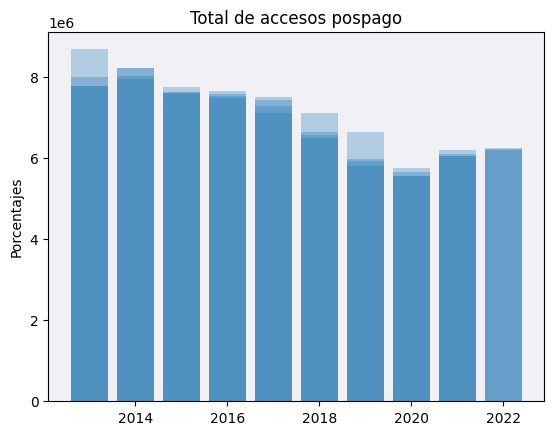

In [95]:
plt.rcParams['axes.facecolor'] = '#F1F0F5'
plt.bar(acces['Año'],acces['Total de accesos pospago'], alpha=0.3)
plt.ylabel('Porcentajes')
plt.title('Total de accesos pospago')
plt.show()

_- El acceso a pospago decreció desde el 2013, pero tiene un ligero realce en el 2021 y 2022_


Incremento Anual

In [96]:
df_grouped = acces.groupby('Año').agg({'Total de accesos operativos': 'first'}).pct_change() * 100
df_grouped = df_grouped.round(2)
df_grouped = df_grouped.rename(columns={'Total de accesos operativos': 'Crecimiento anual %'})
df_grouped

,Crecimiento anual %
Año,
2013,NaN
2014,-3.02
2015,-4.33
2016,2.10
2017,2.50
2018,-3.89
2019,-3.24
2020,-5.11
2021,1.51


_-Hipótesis: El crecimiento y de4crecimiento tienen un patron de onda, A ese ritmo el numero de accesos a internet móvil podria decrecer. No necesariamente significa algo negativo_

In [97]:
df_grouped = ingre.groupby('Año').agg({'Ingresos (miles de $)': 'first'}).pct_change() * 100
df_grouped = df_grouped.round(2)
df_grouped = df_grouped.rename(columns={'Ingresos (miles de $)': 'Crecimiento anual de ingreso %'})
df_grouped

,Crecimiento anual de ingreso %
Año,
2013,NaN
2014,21.34
2015,21.33
2016,28.06
2017,26.02
2018,24.13
2019,29.72
2020,43.45
2021,29.18


In [101]:
df_grouped.mean()

Crecimiento anual de ingreso %    29.258889
dtype: float64

_- Ese sería un indicador de medir la tasa de crecimiento de ingresos por este servicio_

_- La tasa de crecimiento es altísima anualmente, el crecmiento en este rubro es prometedor, en promedio hay un crecimiento de 29% anual_

### 3.3 Conclusiones

La cantidad de accesos a internet tanto para pospago y para prepago a ido deisminuyendo desde el 2013 hasta el 2022, pero la cantidad de ingresos a ido incrementando significativamente, lo cual indica que hay más ingresos de este servicio por cada acceso a internet, es decir, se percibe más por cada persona que tiene internet.

---
### 4. Análisis de Datos de Internet Fijo

### 4.1 Estadística descriptiva

In [104]:
recl = pd.read_csv('Data_set/Data_internet_reclamos/reclamo_motivo_empresas.csv')

In [114]:
recl

,Año,Mes,Motivo de Reclamo,Operador,Cantidad
0,2023,1,Facturación,AMX Argentina S.A. (Claro),16
20,2023,1,Otros,Movistar - Telefonica Moviles Argentina S.A.,24
21,2023,1,Otros,Otros,7
22,2023,1,Otros,TELECENTRO S.A.,6
23,2023,1,Otros,Telecom Argentina S.A.,52
...,...,...,...,...,...
159,2023,5,Gestiones Administrativas,Fibertel S.A. (TCI),5
160,2023,5,Gestiones Administrativas,Movistar - Telefonica Moviles Argentina S.A.,41
161,2023,5,Gestiones Administrativas,NSS S.A.,2
154,2023,5,Facturación,TELECENTRO S.A.,31


In [106]:
# Medidas de Tendencia central de variables numéricas

recl.describe(include=[np.number])

,Año,Mes,Cantidad
count,184.0,184.000000,184.000000
mean,2023.0,3.010870,55.576087
std,0.0,1.414172,121.605537
min,2023.0,1.000000,1.000000
25%,2023.0,2.000000,4.000000
50%,2023.0,3.000000,18.000000
75%,2023.0,4.000000,45.250000
max,2023.0,5.000000,893.000000


_- Solo set tiene datos de los reclamos en el 2023 y solo 5 primeros meses_

_- La cantidad de reclamos es de 184 000 0000_

_- La varianza es alta, podría indicar que hay más reclamos por temporadas dentro del mismo año_

_- Los datos podrían estar dispersos, la media es de 55 576 087 se aleja mucho del minimo que es 1 000 000 y del máximo que es 893 000 000_

### 4.2 Visualización de datos

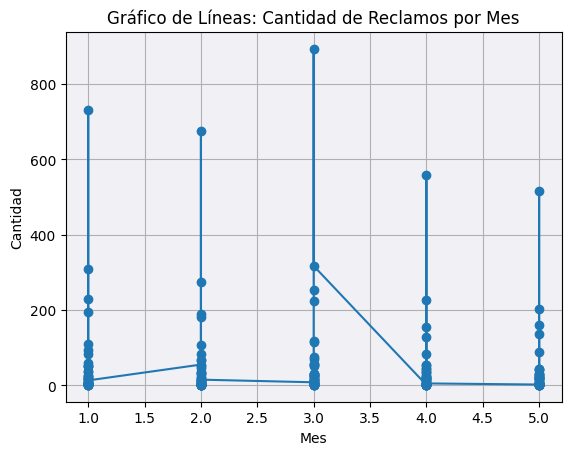

In [115]:
recl = recl.sort_values(by='Mes')

# Crear el gráfico de líneas
plt.plot(recl['Mes'], recl['Cantidad'], marker='o', linestyle='-')

# Personalizar el gráfico
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Gráfico de Líneas: Cantidad de Reclamos por Mes')
plt.grid(True)

# Mostrar el gráfico
plt.show()

_- La cantidad no arroja mucha información, en el mes 3 han ocurrido demasiados reclamos, esto puede deberse a situaciones aisladas, depende de otras variables_

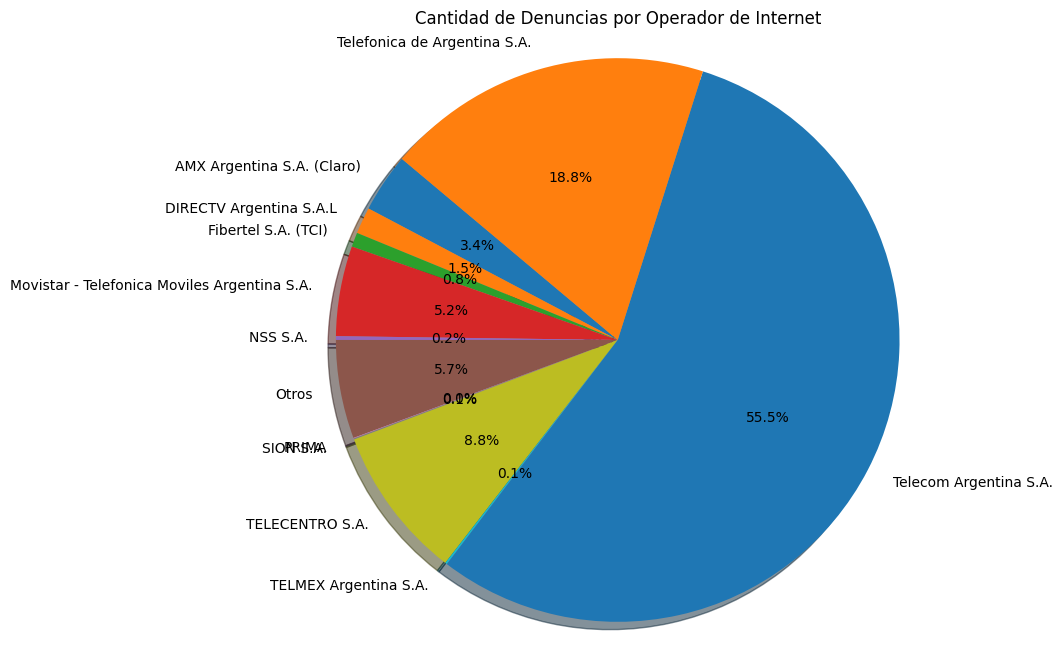

In [117]:
# Agrupar los datos por el operador y calcular la suma de denuncias por operador
operador_denuncias = recl.groupby('Operador')['Cantidad'].sum()

# Obtener los nombres de los operadores y la cantidad de denuncias
operadores = operador_denuncias.index
denuncias = operador_denuncias.values

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))  # Tamaño del gráfico
plt.pie(denuncias, labels=operadores, autopct='%1.1f%%', startangle=140, shadow=True)

# Personalizar el gráfico
plt.axis('equal')  # Hace que el gráfico de pastel sea circular
plt.title('Cantidad de Denuncias por Operador de Internet')

# Mostrar el gráfico
plt.show()

_- Telecom acumula mayor cantidad de reclamo con un 55 %, esto puede estar correlacionado a la cantidad de usuarios que tiene la empresa_

_- Sguidamente tienen mayor cantidad de reclamos Telefónica con 18.8% y Telecentro con un 8.8%_


Naturaleza del reclamo

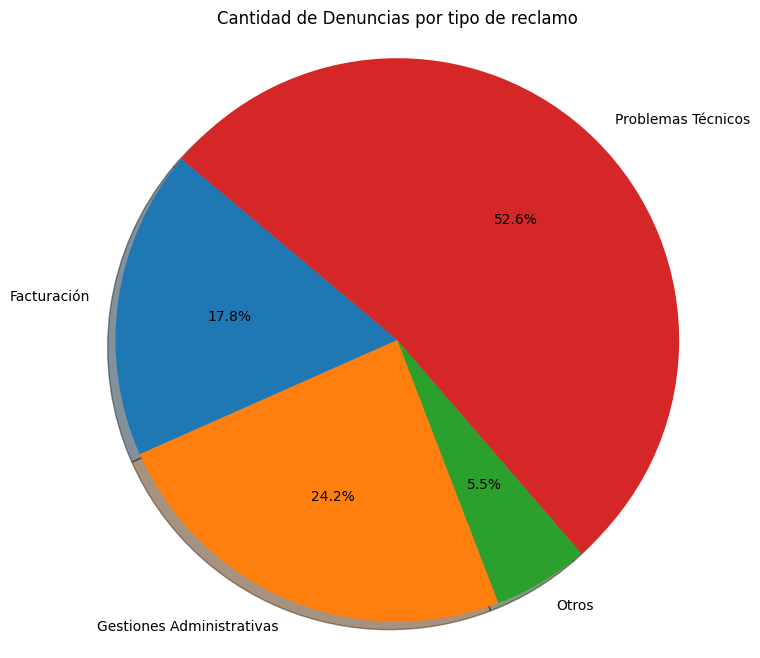

In [121]:
# Agrupar los datos por el operador y calcular la suma de denuncias por operador
operador_denuncias = recl.groupby('Motivo de Reclamo')['Cantidad'].sum()

# Obtener los nombres de los operadores y la cantidad de denuncias
operadores = operador_denuncias.index
denuncias = operador_denuncias.values

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))  # Tamaño del gráfico
plt.pie(denuncias, labels=operadores, autopct='%1.1f%%', startangle=140, shadow=True)

# Personalizar el gráfico
plt.axis('equal')  # Hace que el gráfico de pastel sea circular
plt.title('Cantidad de Denuncias por tipo de reclamo')

# Mostrar el gráfico
plt.show()

_- La mayoría de reclamos tiene un factor técnico con un 52 %. Una variable posiblemente costosa de mitigar_

_- Seguidamente de reclamos de índole administrativo con un 24%, lo cual es una variable que posiblemente sea más sencilla de automatizar. Y seguidamente de reclamos por facturación con un 17.8%, esto puede deberse a errores de sistema, resulta ser una variable más controlable_

### 4.3 Conclusiones

La Calidad del servicio está relacionada a los reclamos. En ese sentido, el análisis de Cantidad de reclamos por tipo de reclamo nos arroja que el 52 % los reclamos estan asociados a problemas técnico, La falla repentina de los equipos o instalaciones es una variable que no está a nuestro control. Sin embargo, las fallas de tipo administrativa y de facturación si es una variable más controlable.


Hay una gran oportunidad en mitigar por medio de kpi´s las fallas de tipo Facturación y de tipo administrativa que juntos acumulan un porcentaje importante del 42%